1. Importing Every Library required

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

2. Read dataset

In [5]:
df=pd.read_csv("insurance.csv")

3. Top 5 tuples

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


4. Bottom 5 tuples

In [7]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


5. Shape of Dataset

In [8]:
df.shape

(1338, 7)

6. Information of data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


7. Describe the data frame

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


8. Finding missing values if any

In [11]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


9. Maximum of every column

In [12]:
df.max()

,0
age,64
sex,male
bmi,53.13
children,5
smoker,yes
region,southwest
charges,63770.42801


10. Correlation

In [13]:
df[['age', 'bmi', 'children', 'charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


12. Age Distribution Plot

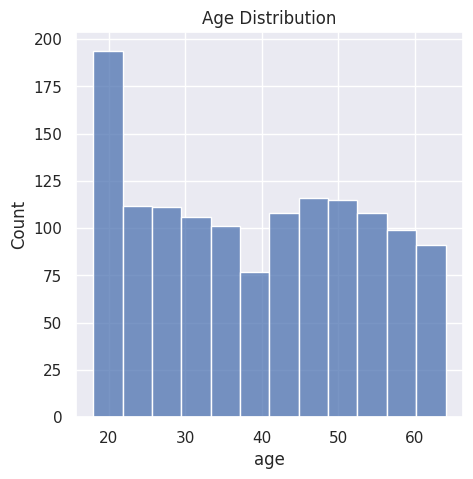

In [14]:
sns.set()
plt.figure(figsize=(5,5))
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

13. Gender Distribution Plot

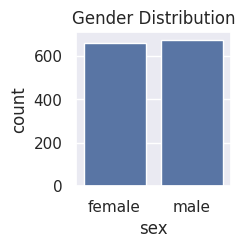

In [15]:
# Gender column
plt.figure(figsize=(2,2))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

14. Value Count of gender column

In [16]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


15. BMI Distribution plot

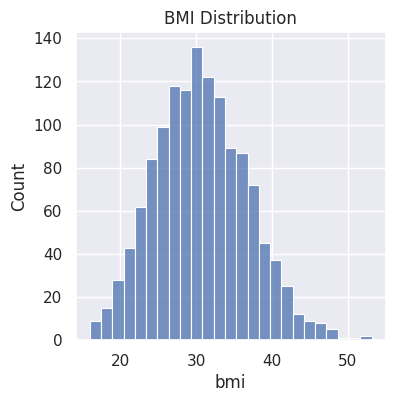

In [17]:
plt.figure(figsize=(4,4))
sns.histplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

16. Children Plot

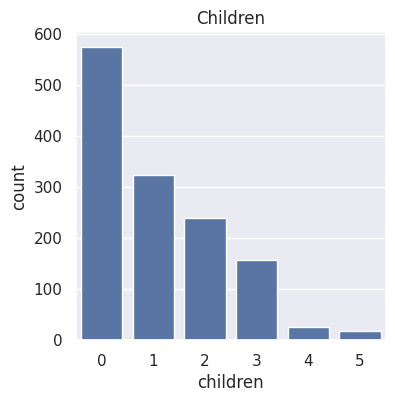

In [18]:
# children column
plt.figure(figsize=(4,4))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

17. Value count of children column

In [19]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


18. Smoker plot

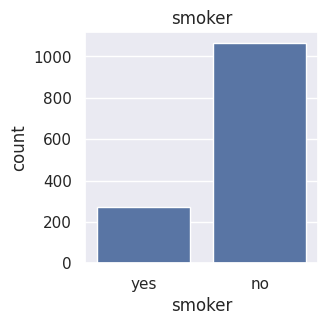

In [20]:
# smoker column
plt.figure(figsize=(3,3))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

19. Value Count of Smoker column

In [21]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


20. Region Plot

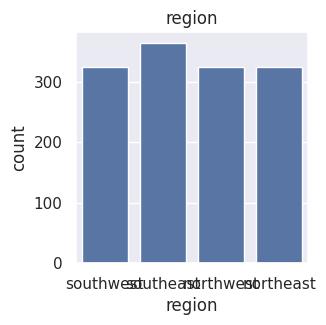

In [22]:
plt.figure(figsize=(3,3))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

21. Charges Distribution Plot

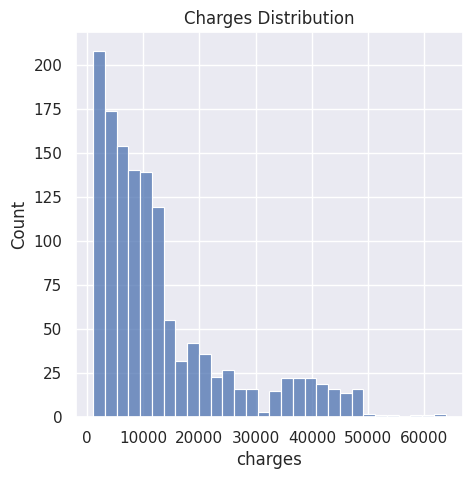

In [23]:
# distribution of charges value
plt.figure(figsize=(5,5))
sns.histplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

22. Heatmap

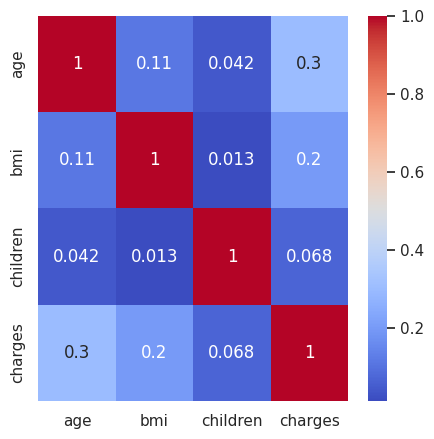

In [24]:
plt.figure(figsize=(5,5))
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(),annot=True,cmap='coolwarm')
plt.show()

23. Charges distribution for patients with BMI greater than 30 i.e. obese
patients

<ipython-input-25-2cc3a45d0725>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi >= 30)]['charges'])


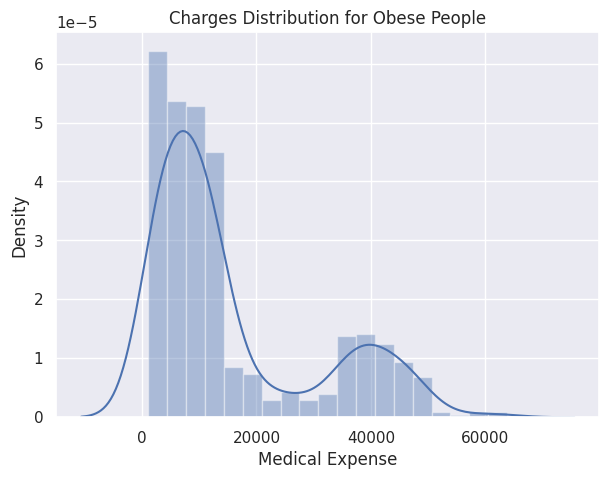

In [25]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

24. Charges distribution for patients with BMI less than 30 i.e. healthy
patients

<ipython-input-26-1ad75a47c6a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi < 30)]['charges'])


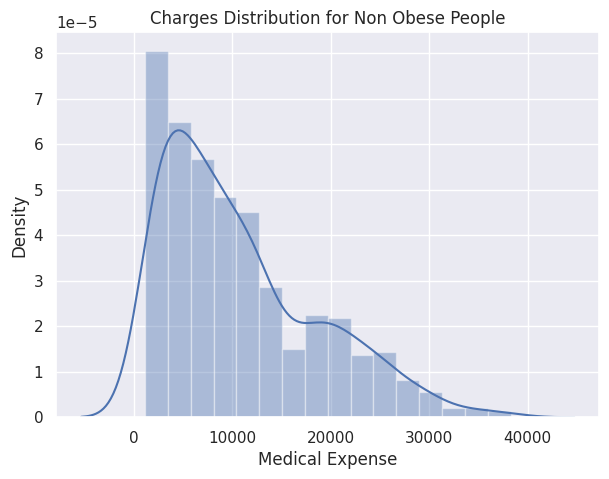

In [26]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

25. Scatter Plot of charges based on age and charges

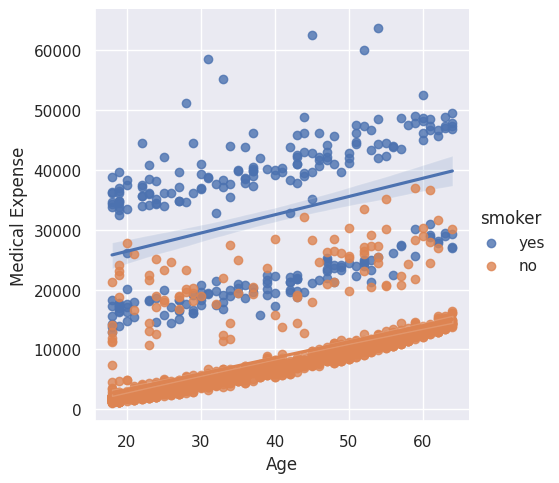

In [27]:
sns.lmplot(x="age", y="charges", data = df, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

26. Function to Find Outliers

In [28]:
def outlier(data):

    mean=data.mean()
    std=data.std()
    mini=data.min()
    maxi=data.max()

    #let find the boundaries for outlier
    highest=data.mean() + 3*data.std()
    lowest=data.mean() - 3*data.std()

        #finally, let find the outlier
    outliers=df[(data>highest) | (data<lowest)]


    return outliers

27. Outliers detection and removal

In [29]:
#outliers detection and remove
new=pd.DataFrame(df["bmi"],columns=["bmi"])
for col in new.columns:
    test=outlier(df[col])
    print("columns name :",col)
    print("numbers of outliers:",len(test))
    print("\n")
    print(test)
    print("<<<<<<<<<------------------------------------->>>>>>>>>")
    df=df.drop(test.index,axis=0)                        #drop the outliers by thier index


columns name : bmi
numbers of outliers: 4


      age   sex    bmi  children smoker     region     charges
116    58  male  49.06         0     no  southeast  11381.3254
847    23  male  50.38         1     no  southeast   2438.0552
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627
<<<<<<<<<------------------------------------->>>>>>>>>


28. Converting BMI to category

In [30]:
#function that will change  bmi to a category
def weightCondition(bmi):
  if bmi<18.5:
    return "Underweight"
  elif (bmi>= 18.5)&(bmi< 24.986):
    return "Normal"
  elif (bmi >= 25) & (bmi < 29.926):
    return "Overweight"
  else:
    return "Obese"
df["weight_Condition"]=[weightCondition(val) for val in df["bmi"] ]
df.head(5)

,age,sex,bmi,children,smoker,region,charges,weight_Condition
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


29. Splitting of Features and Target

In [31]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

30. Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

31. Encoding and Scaling

In [33]:
# Define pipeline for encoding and scaling
pipe1 = ColumnTransformer(
    transformers=[
        ("OHE", OneHotEncoder(sparse_output=False, drop="first"), ["sex", "smoker", "region"]),
        ("ordinal", OrdinalEncoder(categories=[['Underweight', 'Normal', 'Overweight', 'Obese']]), ["weight_Condition"])
    ],
    remainder="passthrough"  # Keep the remaining columns as they are
)

pipe2 = ColumnTransformer(
    transformers=[
        ("scaling", StandardScaler(), [0,1,2,3,4,5,6,7,8])  # Scale all columns except the last one if passthrough
    ],
    remainder="passthrough"
)

# Create a pipeline to apply both transformations sequentially
pipe = Pipeline([
    ("pipe1", pipe1),  # Encoding
    ("pipe2", pipe2)   # Scaling
])

# Apply pipeline transformations on X_train and X_test
X_train = pd.DataFrame(pipe.fit_transform(X_train))
X_test = pd.DataFrame(pipe.transform(X_test))

# Display the head of the transformed X_train DataFrame
X_train.head()


,0,1,2,3,4,5,6,7,8
0,0.962285,1.990676,-0.579154,-0.608034,1.757305,0.835407,1.549636,0.952288,-0.079462
1,0.962285,-0.502342,-0.579154,-0.608034,-0.569053,-1.640647,-1.166112,-1.017671,-0.910696
2,0.962285,-0.502342,-0.579154,-0.608034,-0.569053,-0.402620,-1.309046,-0.811318,0.751772
3,-1.039193,-0.502342,1.726657,-0.608034,-0.569053,0.835407,0.906432,1.156969,0.751772
4,0.962285,-0.502342,-0.579154,-0.608034,1.757305,0.835407,0.692031,-0.050236,-0.910696


32. Function to evaluate Models

In [34]:
#this function used to evalute the models with features and terget.
def models_score(models, x_train, x_test, y_train, y_test):

    scores = {}

    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred=model.predict(x_test)
        scores[name] =r2_score(y_test,y_pred)
        #printing the model name and accuracy !!!!!
        print("Model name: ",type(model).__name__)
        print("R2 score :--->>",r2_score(y_test,y_pred))
        print("\n<<<<------------------------------------------------------------->>>>\n")


    model_scores = pd.DataFrame(scores, index=['R2 Score']).transpose()
    model_scores = model_scores.sort_values('R2 Score',ascending=False)
    return model_scores

33. Initialize Models

In [35]:
#initialize the models
models = {"LinearRegression":LinearRegression(),
          "AdaBoost":AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth= 4, min_samples_leaf= 5), learning_rate= 0.001, loss= 'exponential', n_estimators= 50,random_state=50),
          "GradiantBoost":GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, min_samples_split= 8, random_state=50),
         "RandomForest":RandomForestRegressor(max_depth= 8, max_features= 'sqrt', min_samples_leaf= 4,  n_estimators= 200,random_state=42),
         "XgBoost": XGBRegressor(max_depth=2,learning_rate=0.2),
         "KNeighborsRegressor":KNeighborsRegressor(n_neighbors= 8, weights= 'distance')}

34. Model Scores

In [36]:
model_scores = models_score(models, X_train, X_test, y_train, y_test)

Model name:  LinearRegression
R2 score :--->> 0.7785632890838606

<<<<------------------------------------------------------------->>>>

Model name:  AdaBoostRegressor
R2 score :--->> 0.8825397894268989

<<<<------------------------------------------------------------->>>>

Model name:  GradientBoostingRegressor
R2 score :--->> 0.8844311358159159

<<<<------------------------------------------------------------->>>>

Model name:  RandomForestRegressor
R2 score :--->> 0.8712511000673164

<<<<------------------------------------------------------------->>>>

Model name:  XGBRegressor
R2 score :--->> 0.8842573501485352

<<<<------------------------------------------------------------->>>>

Model name:  KNeighborsRegressor
R2 score :--->> 0.8502412154187382

<<<<------------------------------------------------------------->>>>



35. Building Neural Network

In [37]:
# Initialize the model
model = Sequential()

# Input Layer and First Hidden Layer (with 128 neurons, ReLU activation)
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
# Second Hidden Layer (with 64 neurons, ReLU activation)
model.add(Dense(64, activation='relu'))

# Third Hidden Layer (with 32 neurons, ReLU activation)
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output Layer (single neuron for regression, no activation)
model.add(Dense(1,activation='relu'))

# Compile the model (using mean squared error for regression and Adam optimizer)
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,337 (181.00 KB)

 Trainable params: 46,337 (181.00 KB)

 Non-trainable params: 0 (0.00 B)

36. Training Neural Network

In [38]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 328431936.0000 - val_loss: 324651488.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 352988544.0000 - val_loss: 310350208.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 256088992.0000 - val_loss: 195552928.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 157180976.0000 - val_loss: 67875640.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55973540.0000 - val_loss: 42340500.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35305748.0000 - val_loss: 34792080.0000
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29778590.0000 - val_loss: 32437772.0000
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31155116.0000 - val_loss: 30868134.0000
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30529860.0000 - val_loss: 29750974.0000
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27206738.0000 - val_loss: 29315330.0000
E

37. Neural Network Score

In [39]:
y_pred=model.predict(X_test)
print("Model name: ",type(model).__name__)
print("R2 score :--->>",r2_score(y_test,y_pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Model name:  Sequential
R2 score :--->> 0.8759493461082104


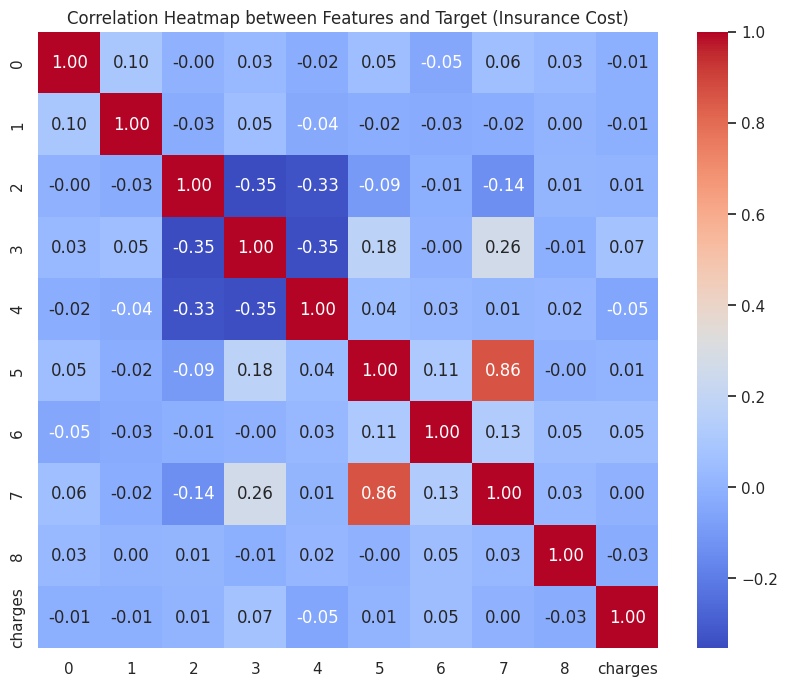

In [40]:
# Assuming X_train is your feature set and 'y_train' is the target
plt.figure(figsize=(10, 8))
correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap between Features and Target (Insurance Cost)')
plt.show()


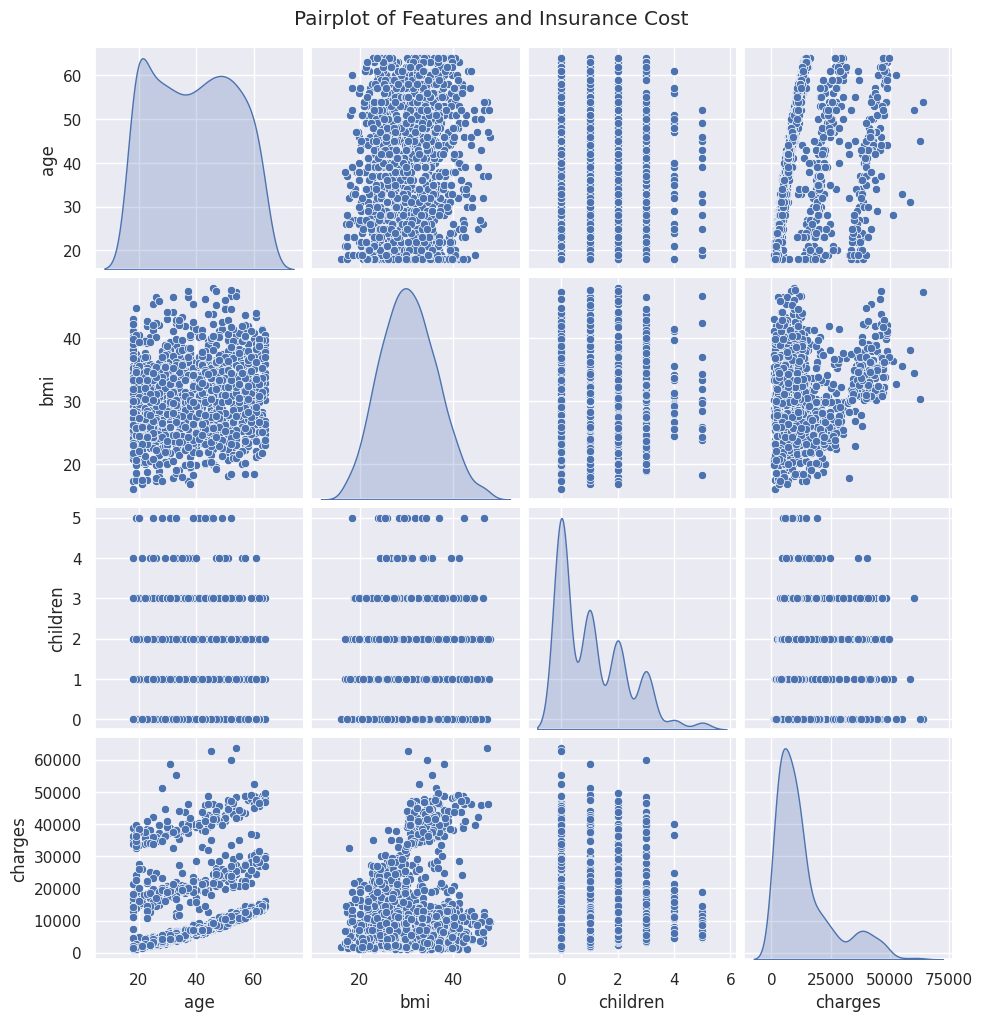

In [41]:
sns.pairplot(pd.concat([X, Y], axis=1), diag_kind="kde")
plt.suptitle('Pairplot of Features and Insurance Cost', y=1.02)
plt.show()


In [44]:
gbrmodel = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, min_samples_split=8, random_state=50)
gbrmodel

GradientBoostingRegressor(min_samples_split=8, random_state=50)

In [45]:
gbrmodel.fit(X_train, y_train)

GradientBoostingRegressor(min_samples_split=8, random_state=50)

In [51]:
Y_pred=gbrmodel.predict(X_test)

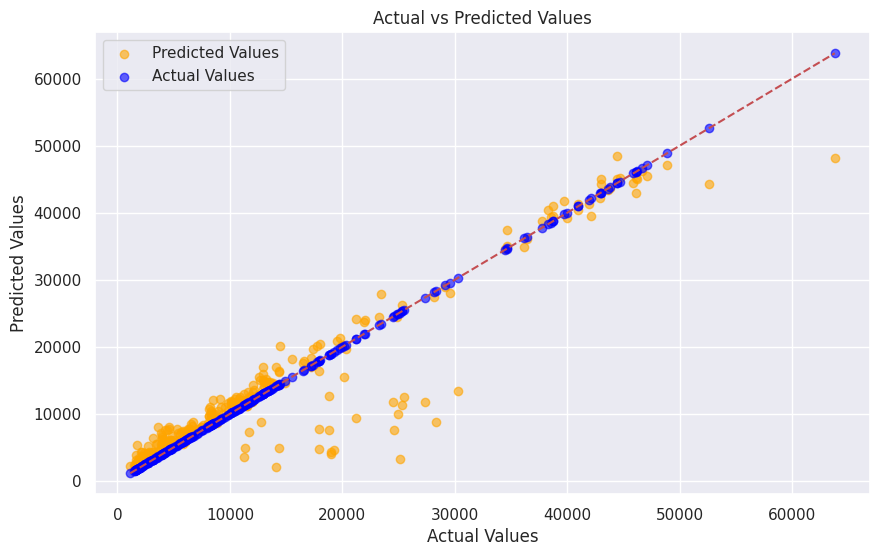

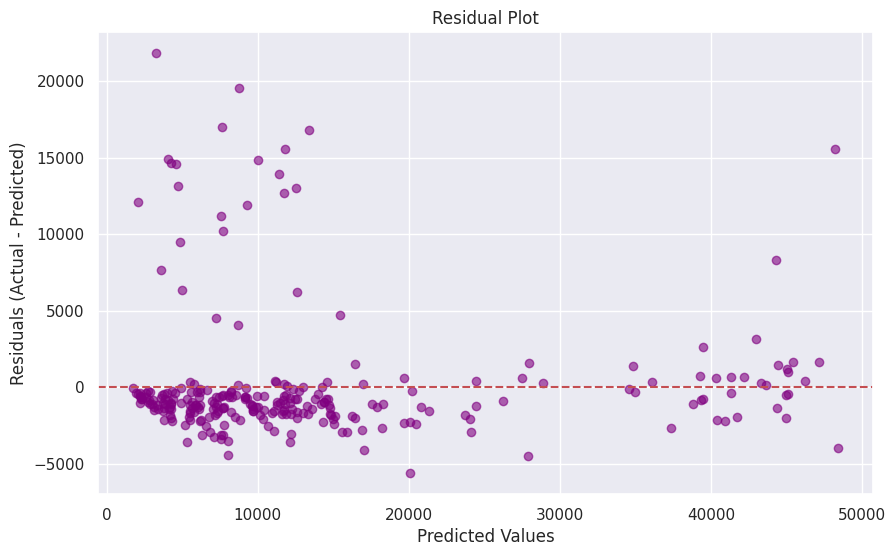

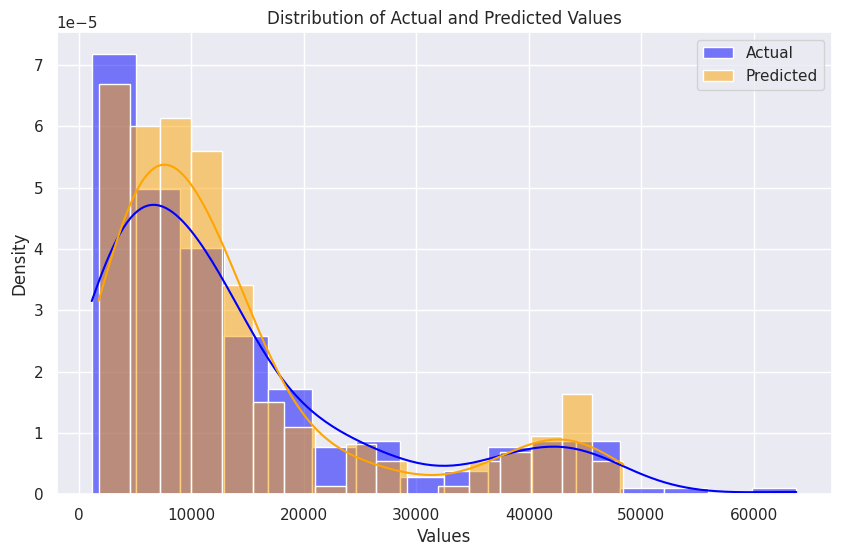

In [55]:
# Assuming y_test and Y_pred are defined
# Scatter plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Y_pred, alpha=0.6, color='orange', label='Predicted Values')
plt.scatter(y_test, y_test, alpha=0.6, color='blue', label='Actual Values')  # Overlay actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Residual plot: Actual vs Residuals (y_test - Y_pred)
residuals = y_test - Y_pred
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--')  # Zero error line
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

# Histogram: Distribution of Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True, stat="density")
sns.histplot(Y_pred, color='orange', label='Predicted', kde=True, stat="density")
plt.title('Distribution of Actual and Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()
